In [2]:
%pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [4]:
Health = pd.read_csv('healthcare_dataset.csv')


In [5]:
Health

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [6]:
# Convert 'Date of Admission' to datetime
Health['Date of Admission'] = pd.to_datetime(Health['Date of Admission'])

# Now you can extract datetime features
Health['Month'] = Health['Date of Admission'].dt.month
Health['Quarter'] = Health['Date of Admission'].dt.quarter 
Health['Year'] = Health['Date of Admission'].dt.year
Health['Day_of_Week'] = Health['Date of Admission'].dt.dayofweek
Health['Is_Weekend'] = Health['Day_of_Week'].isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday

# Add holiday feature (requires datetime conversion first)
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start=Health['Date of Admission'].min(), end=Health['Date of Admission'].max())
Health['Is_Holiday'] = Health['Date of Admission'].isin(holidays).astype(int)

# Add season feature
Health['Season'] = Health['Month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2] else
              'Spring' if x in [3, 4, 5] else
              'Summer' if x in [6, 7, 8] else
              'Fall'
).astype('category')

In [9]:
pd.set_option('display.max_columns', None)  
Health.sample(4)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Month,Quarter,Year,Day_of_Week,Is_Weekend,Is_Holiday,Season
45387,JennIfEr aguiLAr,65,Male,AB-,Cancer,2019-07-30,Stacy Smith,PLC Ellis,Cigna,14580.110670,159,Urgent,2019-08-23,Lipitor,Normal,7,3,2019,1,0,0,Summer
24092,ShElbY LEsteR,19,Female,B-,Diabetes,2019-07-30,Richard Fernandez,"Chen and Jones Reeves,",UnitedHealthcare,28056.237024,471,Urgent,2019-08-21,Lipitor,Inconclusive,7,3,2019,1,0,0,Summer
17296,ViCtOriA BROWN,82,Female,O+,Arthritis,2020-10-16,Christina Brown,"Phillips Johnson Roberts, and",UnitedHealthcare,23271.666113,127,Urgent,2020-11-05,Aspirin,Normal,10,4,2020,4,0,0,Fall
48969,JOrdAn lOPez,45,Male,A-,Hypertension,2021-02-03,George Pope,Smith-Wu,UnitedHealthcare,39434.653555,193,Urgent,2021-02-13,Paracetamol,Inconclusive,2,1,2021,2,0,0,Winter


In [11]:
Health['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [17]:
import plotly.express as px

fig = px.bar(
    Health,
    x='Medical Condition',
    y='Year',
    color='Medical Condition',  # تلوين الأعمدة حسب الحالة الطبية
    color_discrete_map={       # تحديد الألوان يدويًا
        'Cancer': 'blue',
        'Obesity': 'green',
        'Diabetes': 'red',
    
        'Asthma':'#CC0000',
        'Hypertension':'#006600',
        'Arthritis':'#3399FF'
    }
)
fig.show()

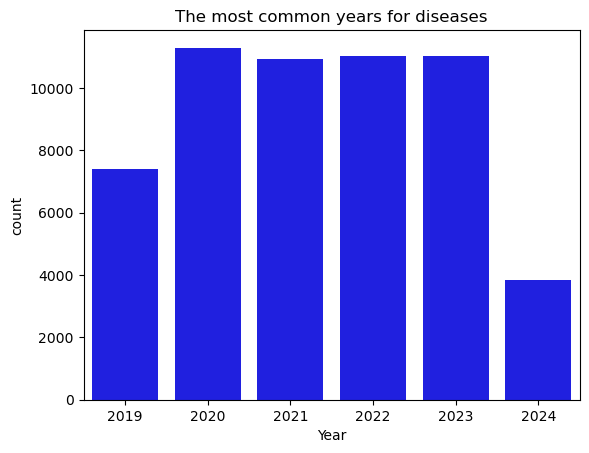

In [20]:
sns.countplot(x='Year',data=Health,color='blue')
plt.title('The most common years for diseases')
plt.show()

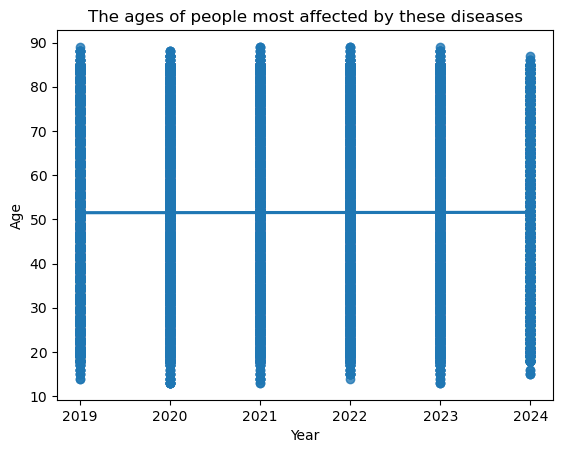

In [24]:
sns.regplot(x='Year',y='Age',data=Health)
plt.title('The ages of people most affected by these diseases')
plt.show()

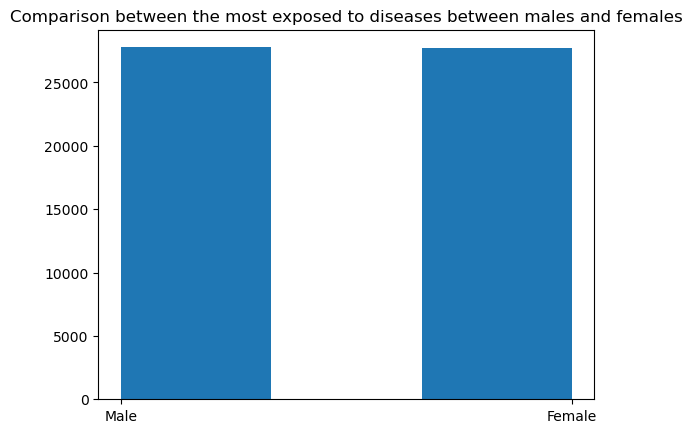

In [28]:
plt.hist(Health['Gender'],bins=3)
plt.title('Comparison between the most exposed to diseases between males and females')
plt.show()

In [30]:
Health['Insurance Provider'].unique()

array(['Blue Cross', 'Medicare', 'Aetna', 'UnitedHealthcare', 'Cigna'],
      dtype=object)

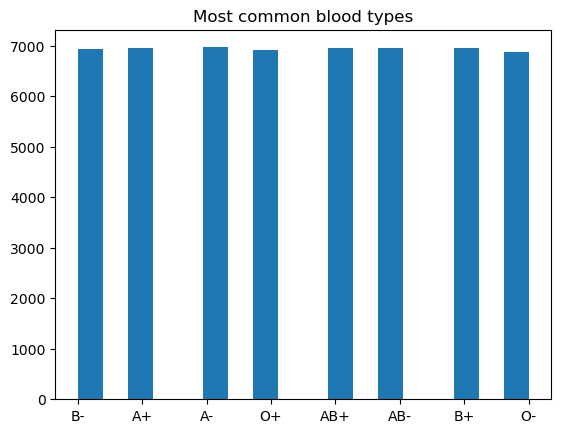

In [37]:
plt.hist(Health['Blood Type'],bins=18)
plt.title('Most common blood types')
plt.show()

In [39]:
Health['Doctor'].value_counts()

Doctor
Michael Smith           27
Robert Smith            22
John Smith              22
Michael Johnson         20
James Smith             20
                        ..
Audrey Zimmerman DDS     1
Justin Banks             1
Joseph Williams Jr.      1
Jason Franklin           1
Jeffrey Moore            1
Name: count, Length: 40341, dtype: int64

In [49]:
winter=Health[Health['Season']=='Winter']
spring=Health[Health['Season']=='Spring']
Fall=Health[Health['Season']=='Fall']
summer=Health[Health['Season']=='Summer']


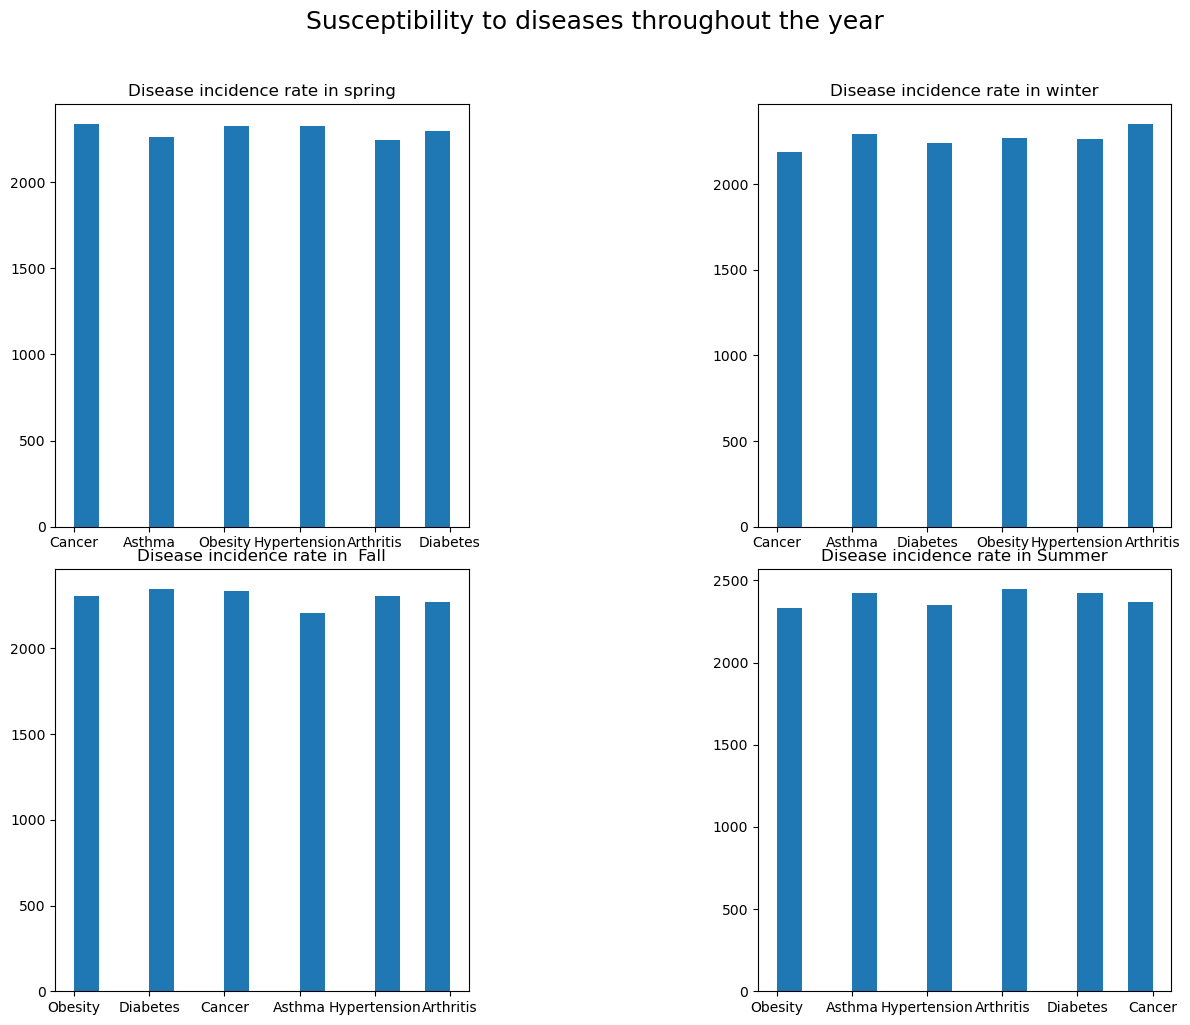

In [54]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].hist(spring['Medical Condition'],bins=15)
axs[0, 0].set_title('Disease incidence rate in spring')

axs[0, 1].hist(winter['Medical Condition'],bins=15)
axs[0, 1].set_title('Disease incidence rate in winter')

axs[1, 0].hist(Fall['Medical Condition'],bins=15)
axs[1, 0].set_title('Disease incidence rate in  Fall')

axs[1, 1].hist(summer['Medical Condition'],bins=15)
axs[1, 1].set_title('Disease incidence rate in Summer')
plt.suptitle('Susceptibility to diseases throughout the year', fontsize=18, y=1.02)
plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.7) 
plt.show()

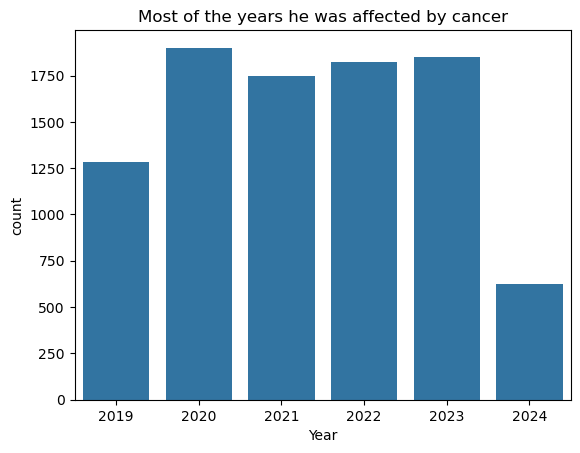

In [80]:
Cancer_2019_2024=Health[Health['Medical Condition']=='Cancer']
sns.countplot(x='Year',data=Cancer_2019_2024)
plt.title('Most of the years he was affected by cancer')
plt.show()

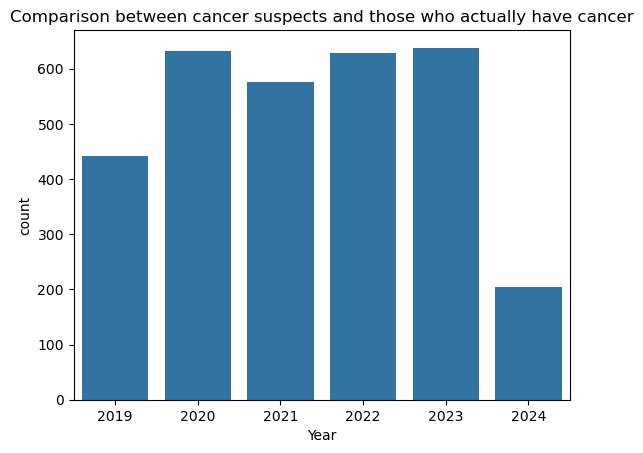

In [86]:
Cancer_2019_2024_Abnormal = Health[(Health['Medical Condition'] == 'Cancer') & 
                                  (Health['Test Results'] == 'Abnormal')]
sns.countplot(x='Year',data=Cancer_2019_2024_Abnormal)
plt.title('Comparison between cancer suspects and those who actually have cancer')
plt.show()



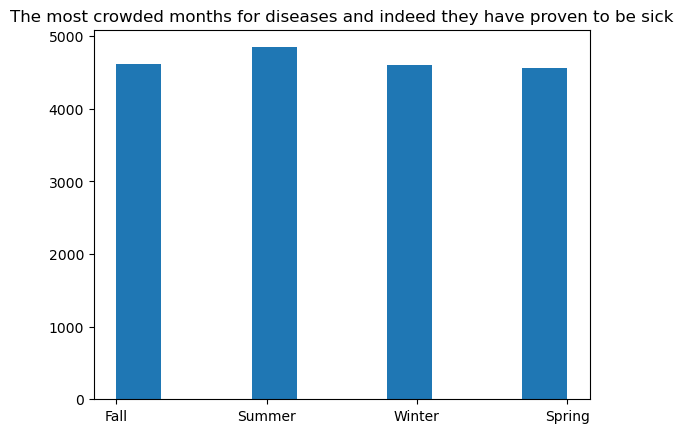

In [89]:
season_Abnormal= Health[Health['Test Results'] == 'Abnormal']
plt.hist(season_Abnormal['Season'],bins=10)
plt.title('The most crowded months for diseases and indeed they have proven to be sick')
plt.show()
